# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import os
os.getcwd()

'/Users/shannonballard/Springboard/Frequentist Inference'

In [2]:
path="/Users/shannonballard/Springboard/Frequentist Inference"
os.chdir(path) 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data is not normally distributed, so the mean is skewed/shifted to the left. The standard deviation is very similar to the value of the mean. These may not be the most appropriate statistics for this data.

In [6]:
mean = np.mean(medical.charges)
mean

13270.422265141257

In [7]:
std = np.std(medical.charges, ddof=1)
std

12110.011236693994

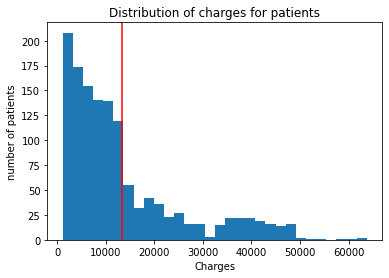

In [8]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of charges for patients')
_ = plt.axvline(mean, color='r')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ By taking multiple random samples of charges, we can obtain a distribution of values. For example, with the mean values, we can get the sampling distribution of the mean. Based on the CLT, the distribution will approach a normal distribution as n increases. We can then think about estimates, including confidence intervals to propose a range of probable values.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A two-sided interval covers the true value 95% of the time and tests for the possibility of positive and negative differences, while one-sided intercals evaluate if there is a difference between groups in a specific direction. Because the administrator is concerned about the average charge falling below 12,000, this would be in a specific direction, and thus a one-sided interval (lower/left-tailed).

In [9]:
pop_mean = np.mean(medical.charges)
print('pop_mean: ', pop_mean)

pop_std = np.std(medical.charges, ddof=1)
print('pop_std: ', pop_std)

pop_mean:  13270.422265141257
pop_std:  12110.011236693994


In [10]:
df = len(medical.charges)-1
t_critical = t.ppf(0.975, df)
print('t_critical: ', t_critical)

t_critical:  1.961739888600845


In [11]:
std_error = pop_std/np.sqrt(len(medical.charges))
std_error

331.06745431568226

In [12]:
# margin of error = t_critical * (pop_std/np.sqrt(sample_size))
margin_of_error = t_critical * std_error
print(margin_of_error)

649.4682309486119


In [13]:
# conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)
conf_int = (round(pop_mean - margin_of_error, 2), round(pop_mean + margin_of_error, 2))
print('conf_int: ', conf_int)

conf_int:  (12620.95, 13919.89)


Because the true mean (13,270.42) is above the lower limit of 12,620.95, the administrator should not be concerned that the actual average has fallen below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H0 - There are no significant differences in mean charges between people with insurance and people without insurance.

H1 - There is a significant difference in mean charges between people with insurance and people without insurance.

There is an assumption that the variances are equal between the two groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [14]:
#establish the group with insurance and determine the number of people in this group
insurance = medical.loc[medical.insuranceclaim == 1]
len_ins = len(insurance)
len_ins

783

In [15]:
#establish the group without insurance and determine the number of people in this group
no_insurance = medical.loc[medical.insuranceclaim == 0]
len_no_ins = len(no_insurance)
len_no_ins

555

In [16]:
#determine the variance (s2) for each group
s0_ins = np.std(insurance.charges, ddof=1)
s02_ins = s0_ins**2
print('s02_ins: ', s0_ins)

s1_no_ins = np.std(no_insurance.charges, ddof=1)
s12_no_ins = s1_no_ins**2
print('s12_no_ins: ', s1_no_ins)

s02_ins:  14045.928418802127
s12_no_ins:  6446.510126811736


In [17]:
sp = np.sqrt((((len_ins-1)*(s02_ins)) + ((len_no_ins-1)*(s12_no_ins))) / (len_ins + len_no_ins - 2))
print('sp: ', sp)

sp:  11520.034268775256


In [18]:
#calculate the pooled std dev
sp = np.sqrt((((len_ins-1)*(s02_ins)) + ((len_no_ins-1)*(s12_no_ins))) / (len_ins + len_no_ins - 2))
print('sp: ', sp)

sp:  11520.034268775256


In [19]:
# Calculate the t-test statistic
ins_mean = np.mean(insurance.charges)
print('ins_mean: ', ins_mean)
no_ins_mean = np.mean(no_insurance.charges)
print('no_ins_mean: ', no_ins_mean)

t_test = (ins_mean - no_ins_mean) / (sp * (np.sqrt((1/len_ins) + (1/len_no_ins))))
print('t test statistic: ', t_test)

ins_mean:  16423.928276537663
no_ins_mean:  8821.421892306294
t test statistic:  11.89329903087671


In [20]:
#calculate the p-value
p_value = t.sf(t_test, (len_ins-1)+ (len_no_ins-1))*2
print('p_value: ', p_value)

p_value:  4.461230231620972e-31


In [21]:
#performing above calculations with scipy.stats
from scipy import stats
stats = stats.ttest_ind(insurance.charges, no_insurance.charges, nan_policy='omit')
stats

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

The t-test statistic and p-value are very similar.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There does not seem to be a similar z-test in scipy.stats. The z-test is used when the distribution of the test statistic can be evaluated with a normal distribution. Z-test use a known standard deviation; whereas, t-tests do not.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test